In [1]:
import pickle
import os
import commonFunctions as cf
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
o3File='D://Archived/Cancer/Data/o3'
pressFile='D://Archived/Cancer/Data/PRESS'
windFile='D://Archived/Cancer/Data/WIND'
rhdpFile='D://Archived/Cancer/Data/RH_DP'
tempFile='D://Archived/Cancer/Data/TEMP'
syear=1980
eyear=2017

In [7]:
variableFile=rhdpFile
variable='RH_DP'
try:
    corrData=pickle.load(open('{}/corrData.pickle'.format(variable),'rb'))
except:    
    corrData=OrderedDict()
    lengthList=[]
    for year in range(syear,eyear+1):    
        o3List=os.listdir(o3File+"/{}".format(year))
        variableList=os.listdir(variableFile+"/{}".format(year))
        if year not in corrData:
            corrData[year]=OrderedDict()
        common=set(o3List).intersection(set(variableList))
        print(len(common))
        for county in common:
            o3Data=pickle.load(open('{}/{}/{}'.format(o3File,year,county),'rb'))
            variableData=pickle.load(open('{}/{}/{}'.format(variableFile,year,county),'rb'))
            corr,length=cf.correlation(o3Data,variableData,gaps=True)
            lengthList.append(length)
            if length>=100 and corr!=0.00:
                corrData[year][county]=corr   
    pickle.dump(corrData,open('{}/corrData.pickle'.format(variable),'wb'))

22


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


18
17


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:2998: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:2999: RuntimeWarning: Mean of empty slice.
  my = y.mean()


18
15
5
6
17
24
41
47
60
66


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


82
106
139
145
158
166
175
194
205
223
233
246
228
241
261
266
270
290
329
335
328
311
321
344
330


In [3]:
def plotHeatmap(plt,data,nyticks,name):
    plt.close()
    plt.clf()
    plt.subplots(figsize=(12,8),dpi=300)
    ax = sns.heatmap(data, vmin=-1, vmax=1,cmap='Purples',linewidth=0.1,square=True,cbar_kws={"shrink": 0.5})
    plt,ax=setplot(plt,ax)
    #ax.text(-0.04, 1.05, 'a)', transform=ax.transAxes, size=15,color='purple')

    ax.xaxis.set_visible(False)
    plt.yticks([i+0.5 for i in range(len(data))],[i for i in nyticks],size=6,rotation=0)
    ax.yaxis.set_ticks_position('none') 

    plt.xlabel('Counties',size=16)
    plt.savefig('Com/images/{}.png'.format(name),bbox_inches='tight')
    plt.show()
    
def plotScatter(data):
    count=0
    plt.close()
    plt,ax=setplot(plt)
    plt.subplots(figsize=(10,10),dpi=200)
    for year in data:
        corrList=data[year]
        plt.scatter([count for i in corrList if corrList[i]!=0.0],[corrList[i] for i in corrList if corrList[i]!=0.0],color='b',s=5)
        count+=1
    plt.show()
    
def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def plotHeatmapBar(plt,data,nxticks,name):
    plt.close()
    plt.subplots(figsize=(18,4),dpi=300)

    ax = sns.heatmap(data, vmin=-1, vmax=1,cmap='PRGn',linewidth=0.1,square=True,cbar_kws={"shrink": 0.5,"orientation": "horizontal"})
    plt,ax=setplot(plt,ax)
    #ax.text(-0.04, 1.05, 'a)', transform=ax.transAxes, size=15,color='purple')

    plt.yticks([i+0.5 for i in range(len(data))],['r($O_{3}$,Temp)','r($O_{3}$,Press)','r($O_{3}$,Wind)','r($O_{3}$,Rh Dp)'],rotation=0)
    plt.xticks([i+0.5 for i in range(len(data[0]))],[i for i in nxticks],size=9)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    #plt.ylabel('r($O_{3}$,P)',size=12,rotation=90)
    plt.savefig('Com/images/{}.png'.format(name),bbox_inches='tight')
    plt.show()
    
def warpIntoLists(temp,maxr,year):
    finalList=[]
    tempList=[]
    yticks=[]
    n=math.ceil(len(temp)/maxr)
    append=maxr*n-len(temp)
    tempList=[temp[i] for i in temp]
    toappend=[-1 for i in range(append)]
    tempN=len(toappend)
    temptempList=[]
    tempList.extend(toappend)
#     if maxr*2>len(tempList):
#         tempList=toappend[0:tempN//2]+tempList+toappend[tempN//2:tempN]
#     else:  
#         tempList=tempList[0:maxr*(n-1)]+toappend[0:tempN//2]+tempList[maxr*(n-1):]+toappend[tempN//2:tempN]
    fool=0
    for i in range(0,len(tempList),maxr):
        finalList.append(tempList[i:i+maxr])
        if fool==0:
            yticks.append(year)
            fool=1
        else:
            yticks.append('')                                                                                           
    return finalList,yticks

Rh_Dp


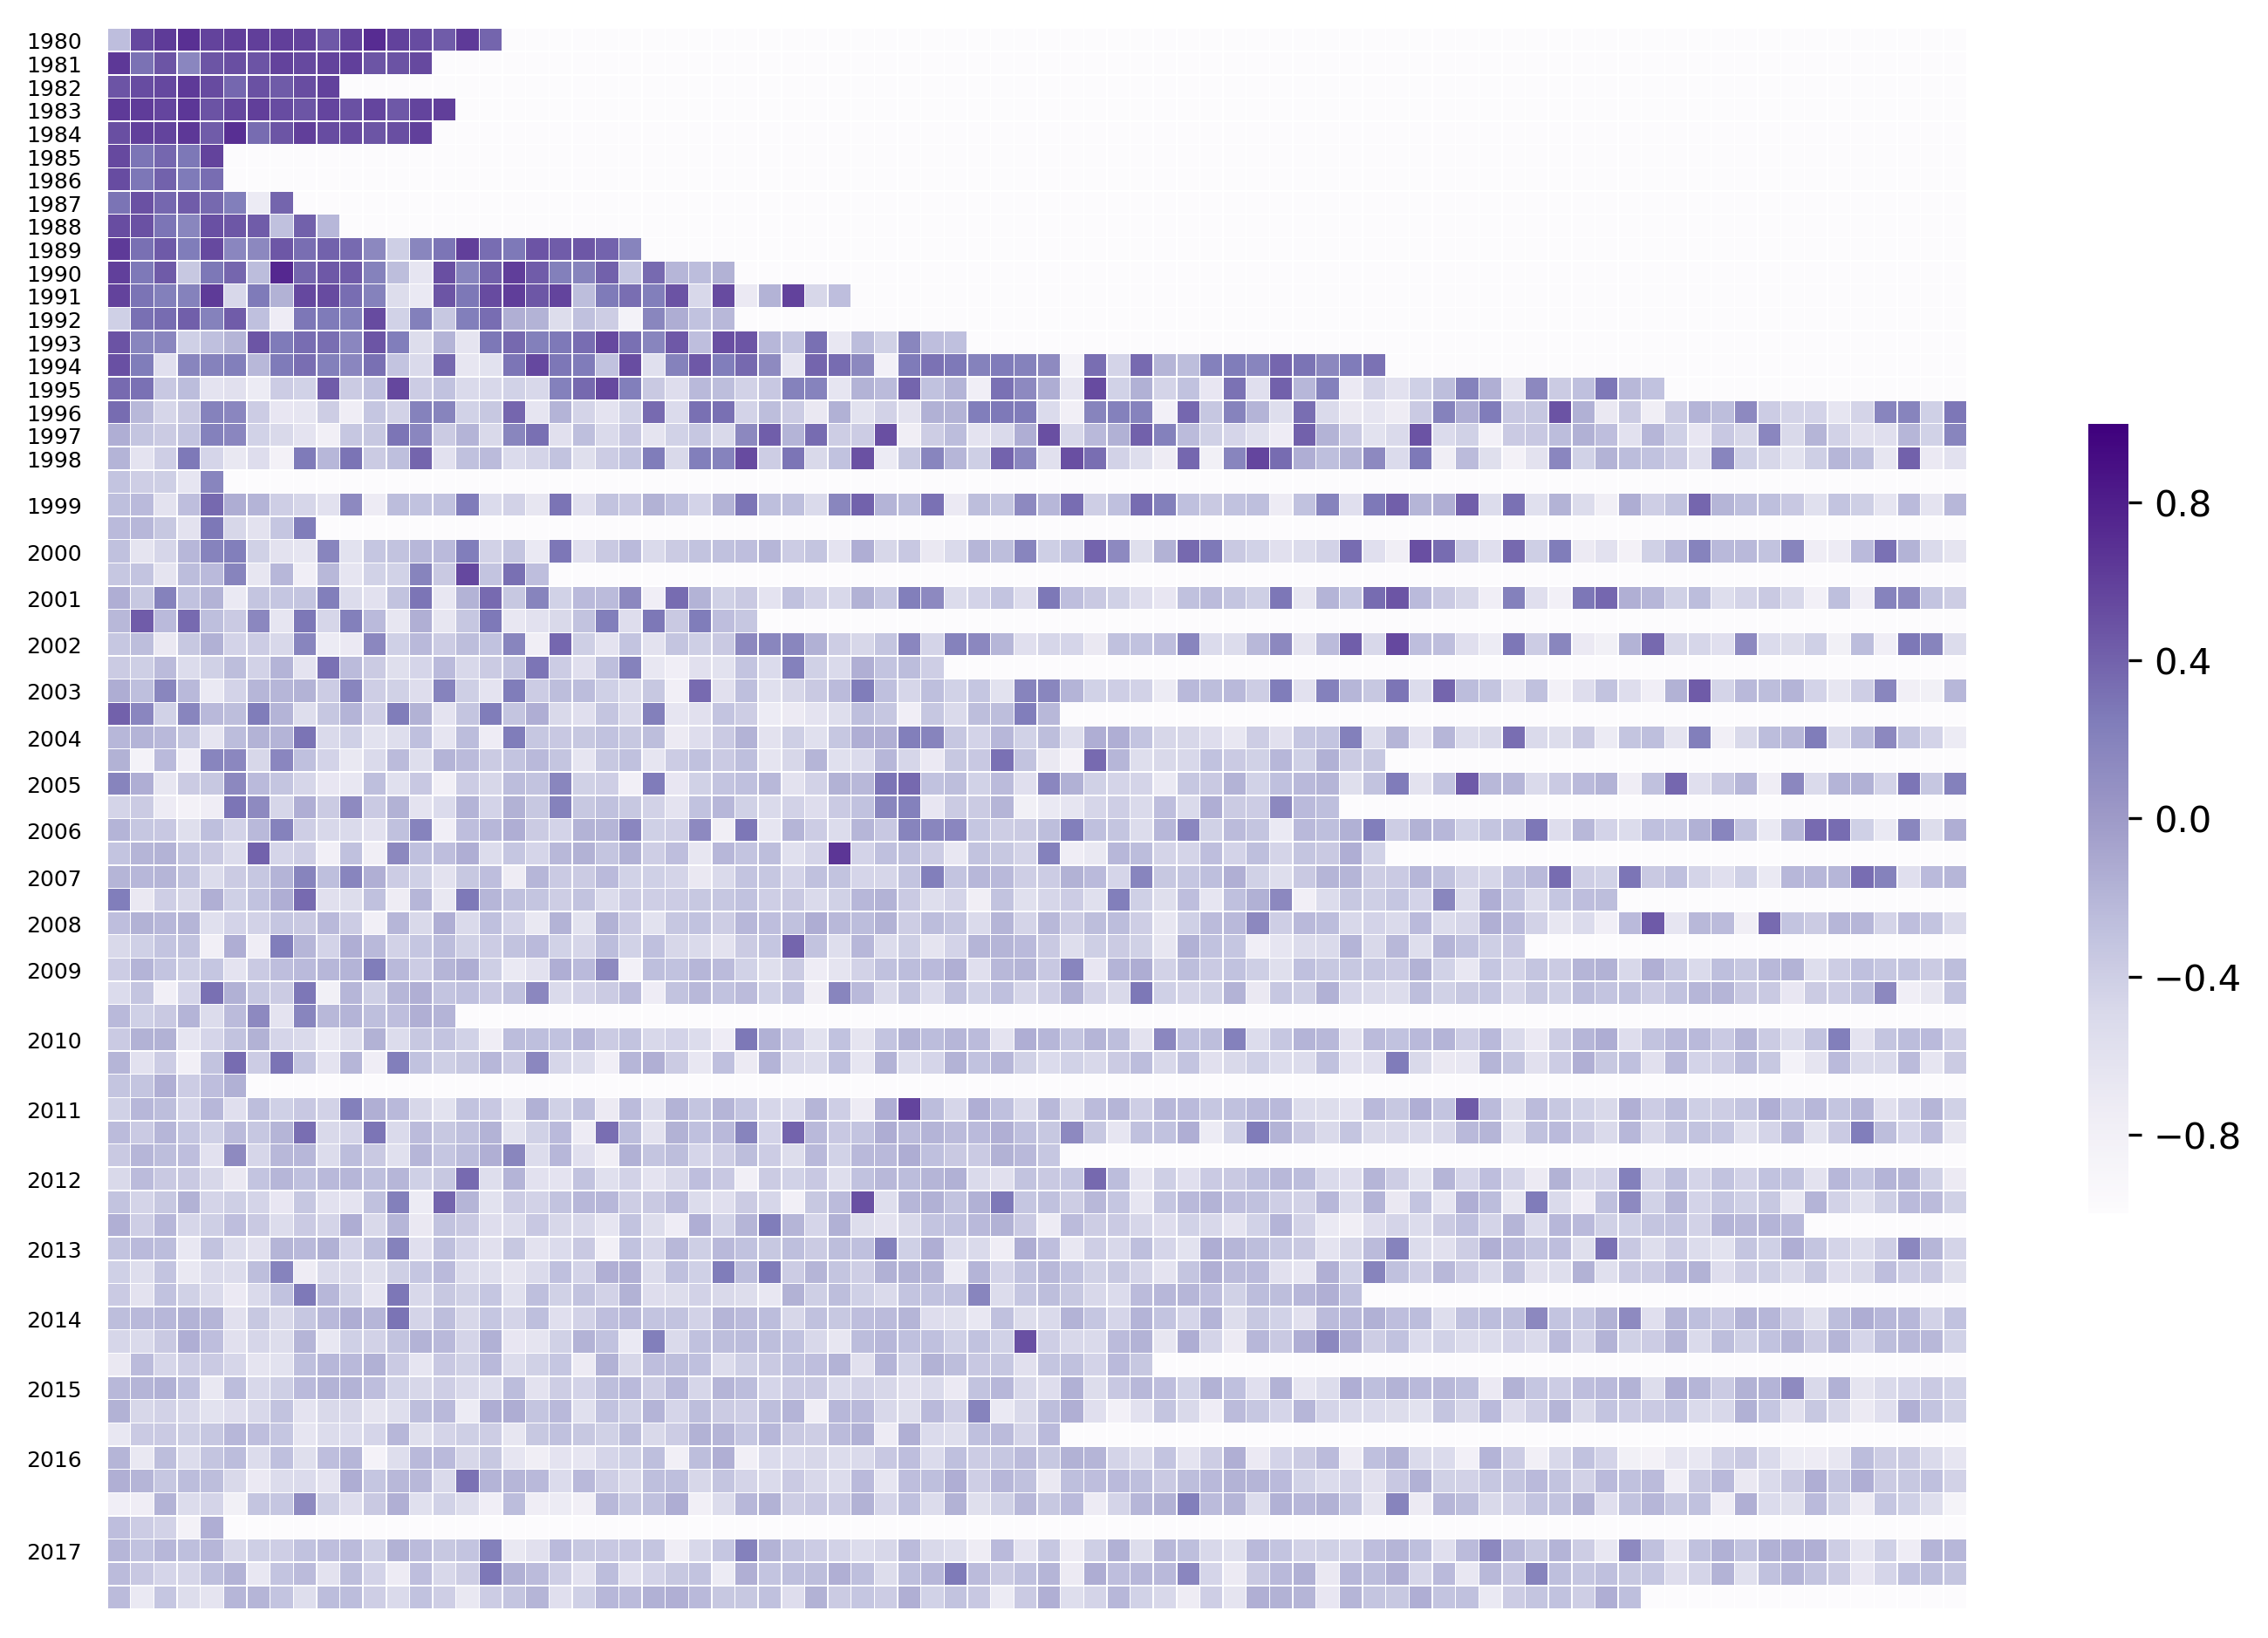

In [24]:
ndata,nyticks=[],[]
yearList=[]
import math
variableFile=rhdpFile
variable='Rh_Dp'

print(variable)
corrData=pickle.load(open('{}/corrData.pickle'.format(variable),'rb'))
  
for year in corrData:
    finalList,yticks=warpIntoLists(corrData[year],80,year)
    ndata.extend(finalList)
    nyticks.extend(yticks)
    
plotHeatmap(plt,ndata,nyticks,variable)
# plotScatter(corrData)

In [13]:
variableFile=windFile
variable='WIND'

try:
    yearCorr=pickle.load(open('{}/yearCorr.pickle'.format(variable),'rb'))
except:
    yearCorr=OrderedDict()
    lengthList=[]
    for year in range(syear,eyear+1):    
        o3List=os.listdir(o3File+"/{}".format(year))
        variableList=os.listdir(variableFile+"/{}".format(year))
        if year not in yearCorr:
            yearCorr[year]=[[],[]]
        common=set(o3List).intersection(set(variableList))
        print(len(common))
        for county in common:
            o3Data=pickle.load(open('{}/{}/{}'.format(o3File,year,county),'rb'))
            variableData=pickle.load(open('{}/{}/{}'.format(variableFile,year,county),'rb'))
            yearCorr[year][0].extend(o3Data)
            yearCorr[year][1].extend(variableData)
        corr,length=cf.correlation(yearCorr[year][0],yearCorr[year][1],gaps=True)
        lengthList.append(length)
        
        
        yearCorr[year]=corr
        
 
    pickle.dump(yearCorr,open('{}/yearCorr.pickle'.format(variable),'wb'))

57
60
64
59
69
72
85
90
103
126
130
148
156
169
186
265
275
282
291
284
303
314
323
326
322
329
351
354
372
398
407
437
454
479
498
504
528
513


In [4]:
PressyearCorr=pickle.load(open('Press/yearCorr.pickle','rb'))
TempyearCorr=pickle.load(open('Temp/yearCorr.pickle','rb'))

WindyearCorr=pickle.load(open('WIND/yearCorr.pickle','rb'))
RhdpyearCorr=pickle.load(open('RH_DP/yearCorr.pickle','rb'))

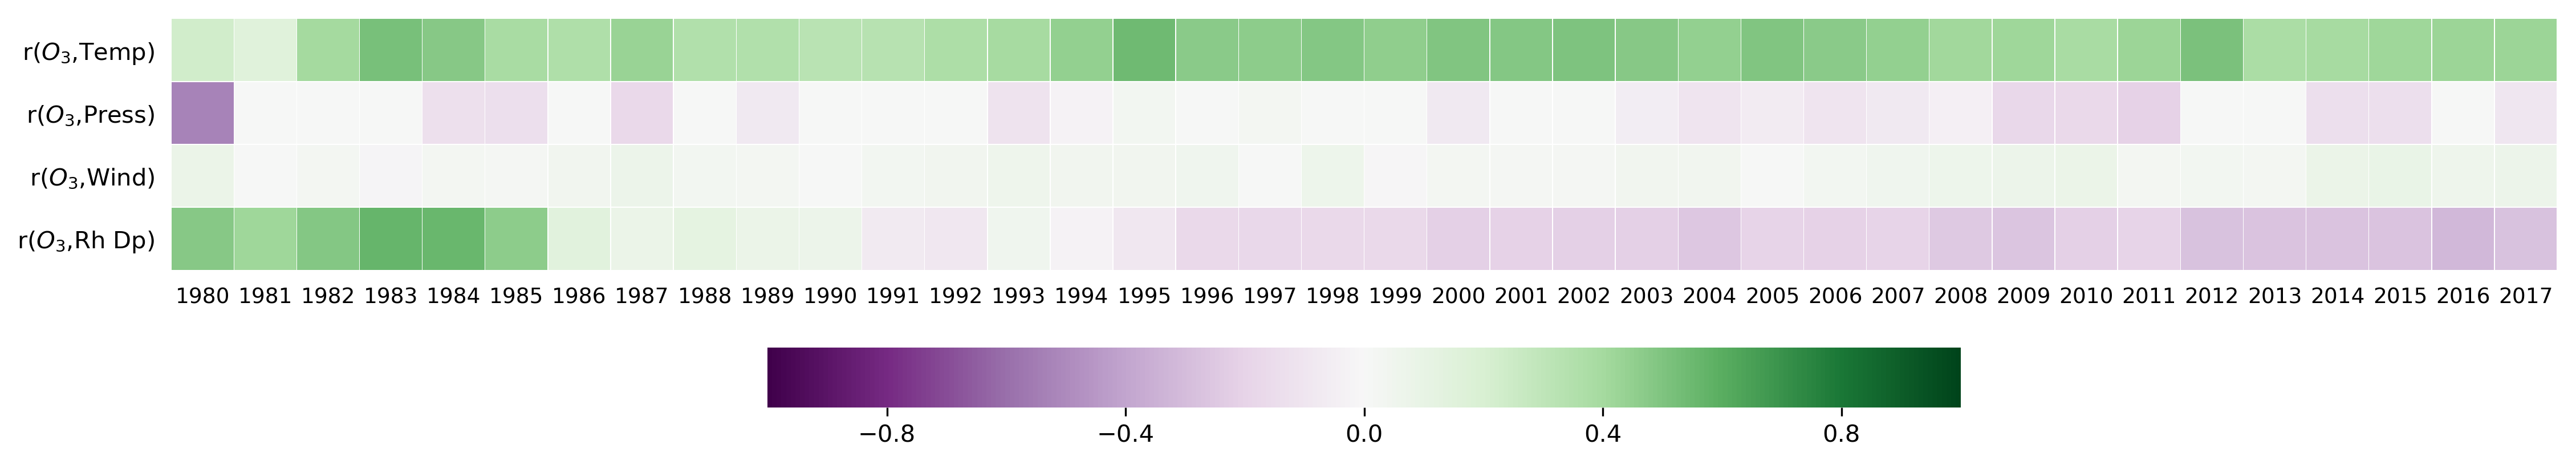

In [6]:
plotHeatmapBar(plt,[[TempyearCorr[i] for i in TempyearCorr],
                    [PressyearCorr[i] for i in PressyearCorr],
                   [WindyearCorr[i] for i in WindyearCorr],
                   [RhdpyearCorr[i] for i in RhdpyearCorr]],
               
               [i for i in range(syear,eyear+1)],'Figure-2')

In [33]:
sns.reset_defaults()